# Producción de cemento Solución

## Enunciado
Artos S.A. es una empresa dedicada a la producción de cemento que cuenta con una única planta en la ciudad de Barranquilla. La empresa debe determinar la cantidad de toneladas de cemento a producir en cada una de las siguientes 12 semanas. Los costos de producción, costos de almacenamiento, así como la demanda y el precio por tonelada de cemento, varían semana a semana y se presentan en la siguiente tabla. 



|Semana|Costo de producción \[Miles de COP/ton\]|Costo de almacenamiento \[Miles de COP/ton\]|Demanda \[ton\]|Precio \[Miles de COP/ton\]|
|:---:|:---:|:---:|:---:|:---:|
|1|172.8|6.9|95,000|432.0|
|2|178.7|7.2|99,750|440.6|
|3|174.6|8.0|104,738|449.5|
|4|181.4|8.9|109,974|458.4|
|5|183.0|9.0|109,974|467.6|
|6|177.7|7.8|109,974|477.0|
|7|182.8|6.7|120,972|486.5|
|8|186.8|7.3|120,972|496.2|
|9|181.8|7.8|108,875|506.2|
|10|178.3|8.8|97,987|516.3|
|11|173.4|9.2|78,390|526.6|
|12|168.8|8.4|94,068|537.1|

Tenga en cuenta que, al inicio de la planeación, se cuenta con 12,000 toneladas de cemento y que, por especificaciones de la maquinaria, no se puede producir más de 110,000 toneladas ni menos de 85,000 toneladas en una semana cualquiera.

## Formulación 
**1.** Formule el problema de optimización lineal con el fin de determinar la producción semanal de Artos y lograr la mayor utilidad posible. Para esto usted debe seguir los siguientes pasos: <br>



**a.** Escriba lo(s) conjunto(s), parámetro(s) y variable(s) de decisión que utilizará en el modelo.

### Conjuntos
- $S$: Conjunto de semanas

### Parámetros
- $d_{i}$: demanda de la semana $i\in S$
- $p_{i}$: precio por tonelada de cemento en la semana $i\in S$
- $c_i$: costo de producir una tonelada de cemento en la semana $i\in S$
- $h_i$: costo de almacenamiento de una tonelada de cemento en la semana $i\in S$
- $I_0$: inventario inicial de toneladas de cemento

### Variables de decisión
- $x_{i}$: toneladas de cemento a producir en la semana $i\in S$
- $I_i$: toneladas de cemento que se tienen en inventario al final de la semana $i\in S$


### Restricciones
**b.** Escriba la(s) restricción(es) lineal(es) que describe(n) que se deben respetar los límites de producción

\begin{align*}
x_i&\leq 110000, &&\forall i \in S\\
x_i&\geq 85000, &&\forall i \in S\\
\end{align*}

**c.** Escriba la(s) restricción(es) lineal(es) que contabiliza(n) el inventario de cada semana

\begin{align*}
I_1&=I_0+x_1-d_1\\
I_i&=I_{i-1}+x_i-d_i,  &&\forall i \in S|i\ge 1
\end{align*}


### Naturaleza de las variables
**d.** Escriba la(s) restricción(es) que describe(n) matemáticamente el tipo de variable(s) que está utilizando dentro del modelo

\begin{align*}
x_i&\geq 0,&&\forall i \in S\\
I_i&\geq 0,&&\forall i \in S
\end{align*}

### Función Objetivo
**e.** Escriba la función objetivo

\begin{equation*}
    max \sum_{i\in S}d_ip_i-x_ic_i-I_ih_i
\end{equation*}

## Formulación matemática completa

**Conjuntos:**
- $S$: Conjunto de semanas

**Parámetros:**
- $d_{i}$: demanda de la semana $i\in S$
- $p_{i}$: precio por tonelada de cemento en la semana $i\in S$
- $c_i$: costo de producir una tonelada de cemento en la semana $i\in S$
- $h_i$: costo de almacenamiento de una tonelada de cemento en la semana $i\in S$
- $I_0$: inventario inicial de toneladas de cemento

**Variables de decisión:**
- $x_{i}$: toneladas de cemento a producir en la semana $i\in S$
- $I_i$: toneladas de cemento que se tienen en inventario al final de la semana $i\in S$

\begin{equation*}
    max \sum_{i\in S}d_ip_i-x_ic_i-I_ih_i\text{ (1)}
\end{equation*}

\begin{align*}
x_i&\leq 110000, &&\forall i \in S; &(2)\\
x_i&\geq 85000, &&\forall i \in S; &(3)\\
I_1&=I_0+x_1-d_1,&& &(4)\\
I_i&=I_{i-1}+x_i-d_i,  &&\forall i \in S|i\ge 1;  &(5)\\
x_i&\geq 0,&&\forall i \in S; &(6)\\
I_i&\geq 0,&&\forall i \in S; &(7)
\end{align*}

La función objetivo (1) maximiza las utilidades totales. Las restricciones (2) y (3) garantizan que para cada semana $i\in S$ la producción $x_i$ respete los límites de producción. Las restricciones (4) y (5) contabilizan los inventarios para cada semana $i \in S$. Las restricciones (6) y (7) describen la naturaleza de las variables $x_i$ y $I_i$.

## Implementación
**2.** Resuelva su modelo. Reporte sus resultados de una manera amigable

In [1]:
#%%se importa la libreria de PulP
import pulp as lp

#-----------------
# Conjuntos
#-----------------
#Semanas
S=[i for i in range(1,13)]

#-----------------
# Parámetros
#-----------------
#Se cargan todos los parámetros del modelo
parametros={# Semana: (costo producción,costo almacenamiento,demanda,precio)
    1:(172.8,6.9,95000,432.0),
    2:(178.7,7.2,99750,440.6),
    3:(174.6,8.0,104738,449.5),
    4:(181.4,8.9,109974,458.4),
    5:(183.0,9.0,109974,467.6),
    6:(177.7,7.8,109974,477.0),
    7:(182.8,6.7,120972,486.5),
    8:(186.8,7.3,120972,496.2),
    9:(181.8,7.8,108875,506.2),
    10:(178.3,8.8,97987,516.3),
    11:(173.4,9.2,78390,526.6),
    12:(168.8,8.4,94068,537.1)}

#Se separan los parámetros del diccionario general
#Semana: costo de producción por tonelada en la semana i
c={i:parametros[i][0] for i in parametros.keys()}

#Semana: costo de almacenamiento por tonelada en la semana i
h={i:parametros[i][1] for i in parametros.keys()}

#Semana: demanda de la semana i
d={i:parametros[i][2] for i in parametros.keys()}

#Semana: precio por tonelada en la semana i
p={i:parametros[i][3] for i in parametros.keys()}


#Inventario inicial de toneladas de cemento
I0=12000

#%%
#-------------------------------------
# Creación del objeto problema en PuLP
#-------------------------------------
#Crea el problema para cargarlo con la instancia 
problema=lp.LpProblem("Inventarios",lp.LpMaximize)

#-----------------------------
# Variables de Decisión
#-----------------------------
x=lp.LpVariable.dicts('x',S,lowBound=0,cat='Continuous') #toneladas de cemento a producir en cada semana
I=lp.LpVariable.dicts('I',S,lowBound=0,cat='Continuous') #toneladas de cemento en inventario en cada semana

#-----------------------------
# Función objetivo
#-----------------------------
#Crea la expresión de maximización de utilidades
problema+=lp.lpSum(d[i]*p[i]-x[i]*c[i]-I[i]*h[i] for i in S), "Utilidades Totales"

#-----------------------------
# Restricciones
#-----------------------------
for i in S:
    #Se garantiza que se respeten los limites de producción
    problema+=x[i]<=110000, "Límite superior de producción en la semana "+ str(i)
    problema+=x[i]>=85000, "Límite inferior de producción en la semana "+ str(i)
    
    
#Contabilizar los inventarios de cada semana  
problema+=I[1]==I0+x[1]-d[1], "Inventario en la semana 1"
for i in S:
    if i > 1:
        problema+=I[i]==I[i-1]+x[i]-d[i], "Inventario en la semana "+ str(i)

        
#-----------------------------
# Invocar el optimizador
#-----------------------------
#Optimizar el modelo con CBC (default de PuLP)
problema.solve()

#%%
#-----------------------------
# Imprimir formato LP
#-----------------------------
#Escribe el problema en un archivo con formato LP 
problema.writeLP("Inventarios.lp")


#-----------------------------
#    Imprimir resultados
#-----------------------------
#Imprimir estado final del optimizador
print("Estado (optimizador):", lp.LpStatus[problema.status],end='\n')

#Valor óptimo del portafolio de Petroco    
print("\nInventarios - Utilidades totales = $", round(lp.value(problema.objective),2)*1000)
print()

#Imprimir variables de decisión
print("Variables de decisión")
print("Semana","Producción (ton)", "Inventario (ton)",sep='\t\t')
for i in S:
    print(i,str(round(x[i].value(),2))+ " \t",round(I[i].value(),2),sep='\t\t')


Estado (optimizador): Optimal

Inventarios - Utilidades totales = $ 380356850800.0

Variables de decisión
Semana		Producción (ton)		Inventario (ton)
1		89354.0 			6354.0
2		110000.0 			16604.0
3		110000.0 			21866.0
4		110000.0 			21892.0
5		110000.0 			21918.0
6		110000.0 			21944.0
7		110000.0 			10972.0
8		110000.0 			0.0
9		108875.0 			0.0
10		97987.0 			0.0
11		85000.0 			6610.0
12		87458.0 			0.0


### Visualización de resultados

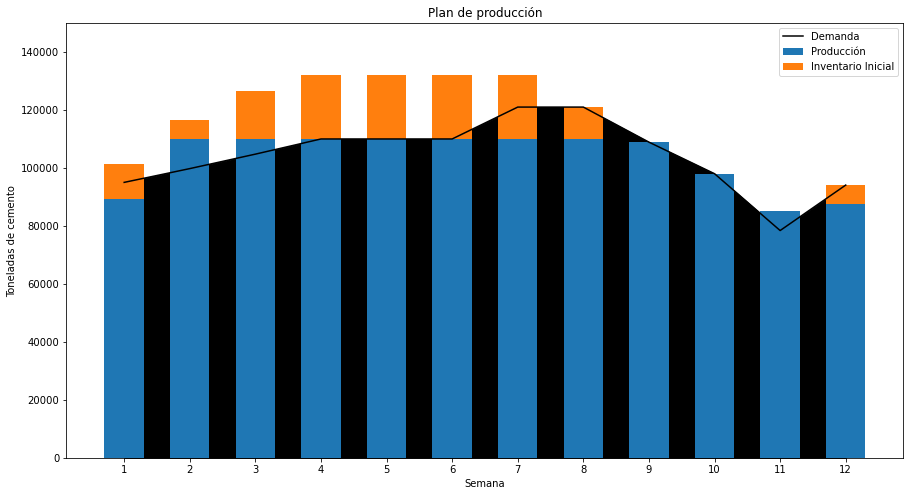

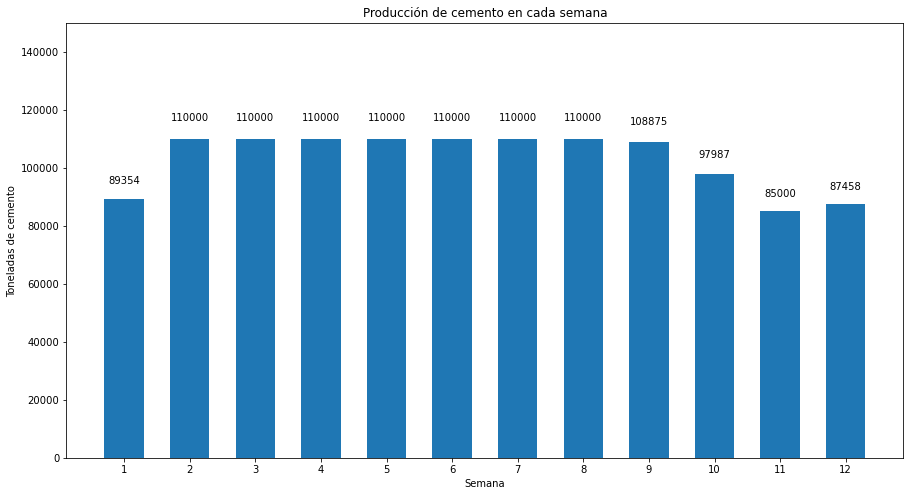

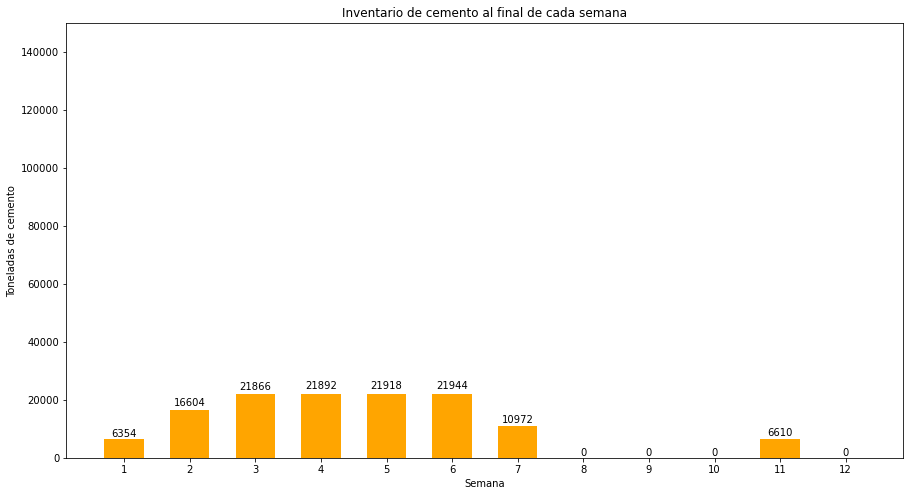

In [60]:
#se importa la libreria que se utilizará para la visualización
import matplotlib.pyplot as plt

#se guarda en una lista los valores de producción, de inventario final e  inventario inicial de cada semana
Prod=[x[i].value() for i in S] #producción de cada semana
Inv_F=[I[i].value() for i in S] #inventario al final de cada semana
Inv_I=[] #inventario al inicio de cada semana
Inv_I.append(I0) #se define el inventario inicial en el primer mes
for i in S:
    if i>=2:
        Inv_I.append(I[i-1].value()) #inventario al inicio de la semana i


#------------------------------------------------------------------------
#    Gráfica conjunta (producción + inventario inicial & demanda)
#------------------------------------------------------------------------
fig3, ax1 = plt.subplots(figsize=(15,8)) #se crea la gráfica donde se va a visualizar el plan de producción conjunto con la demanda y el inventario al inicio de cada semana
p1 = ax1.bar(S, Prod, width=0.6, tick_label=S) #se añaden las barras de producción a la gráfica
p2 = ax1.bar(S, Inv_I, bottom=Prod, width=0.6, tick_label=S) #se añaden las barras de inventario inicial a la gráfica (encima de las de producción)
l1 = ax1.plot(S, d.values(), color="black") #se añaden una línea, que representa la demanda, a la gráfica que representa la demanda
ax1.fill_between(S,d.values(),color="black") #se rellena el área bajo la curva de demanda

ax1.set_title('Plan de producción') #se añade el titulo de la gráfica
ax1.set_xlabel('Semana') #se añade el label del eje x
ax1.set_ylabel('Toneladas de cemento') #se añade el label del eje y
ax1.set_ylim([0,150000]) #se establece el rango del eje y 
ax1.legend((l1[0],p1[0], p2[0]), ('Demanda','Producción', 'Inventario Inicial')) #se añaden los labels de cada componente de la gráfica 


#-----------------------------
#    Plan de producción
#-----------------------------
fig1, ax2 = plt.subplots(figsize=(15,8)) #se crea la gráfica donde se va a visualizar el plan de producción
rects1=ax2.bar(S, Prod, width=0.6, tick_label=S) #se añaden las barras a la gráfica

#se añaden los labels a cada barra con el número de toneladas de cemento producidas cada semana
for rect in rects1:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height), ha='center', va='bottom')

ax2.set_title('Producción de cemento en cada semana') #se añade el titulo de la gráfica
ax2.set_xlabel('Semana') #se añade el label del eje x
ax2.set_ylabel('Toneladas de cemento') #se añade el label del eje y
ax2.set_ylim([0,150000]) #se establece el rango del eje y 


#-----------------------------
#    Inventario Final
#-----------------------------
fig2, ax3 = plt.subplots(figsize=(15,8)) #se crea la gráfica donde se va a visualizar el inventario al final de cada semana
rects2=ax3.bar(S, Inv_F, width=0.6, tick_label=S, color="orange") #se añaden las barras a la gráfica

#se añaden los labels a cada barra con el número de toneladas de cemento en inventario al final de cada semana
for rect in rects2:
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height), ha='center', va='bottom')

ax3.set_title('Inventario de cemento al final de cada semana') #se añade el titulo de la gráfica
ax3.set_xlabel('Semana') #se añade el label del eje x
ax3.set_ylabel('Toneladas de cemento') #se añade el label del eje y
ax3.set_ylim([0,150000]) #se establece el rango del eje y 


#se muestran las gráficas
plt.show()

## Créditos

Equipo Principios de Optimización<br>
Instancia: Camilo Aguilar León, Juan Felipe Rengifo<br>
Fecha: 25/09/2020